In [19]:
import sys
print (sys.version)
import numpy as np
print (np.__version__)
import pandas as pd
print (pd.__version__)
import matplotlib
print (matplotlib.__version__)
import sklearn
print (sklearn.__version__)

3.7.12 (default, Jan 15 2022, 18:48:18) 
[GCC 7.5.0]
1.21.5
1.3.5
3.2.2
1.0.2


In [20]:
import numpy as np
import time
b = 10
# (A)
freq = np.zeros(10)
# (B)
arr = np.random.normal(size=1000000)
tts = time.time()
for j in range(arr.size) :
 ind = int(arr[j]*2.0+5.0)
 # (start)
try:
  freq[ind]+=1
except IndexError:
  ind = 0 if ind<0 else ( b-1 if ind>=b else ind )
  freq[ind]+=1
# (end)
tte = time.time()
print ("time = ",tte-tts)
print (freq)

print ('mean = ',np.mean(arr))
# (C)
print(arr)
print(np.argmin(arr))
print(np.argmax(arr))
print(np.median(arr))
print(np.var(arr))

time =  0.671668529510498
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
mean =  -0.0013881038600918316
[-1.56231133 -0.91393237 -0.87747733 ... -1.04838379  0.48163675
  0.07864931]
528741
780589
-0.002293681832061672
1.0004724956270419


time =  0.813539981842041
[21177, 43982, 91802, 150260, 191968, 190994, 149774, 91577, 44562, 23904]
mean =  0.00024112131865891575


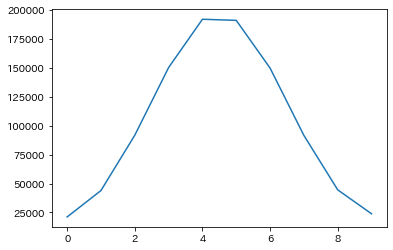

In [21]:
import numpy as np
from scipy.interpolate import make_interp_spline
import time
b = 10
# (A)
freq = [0 for _ in range(b)]
# (B)
arr = np.random.normal(size=1000000)
tts = time.time()
for j in range(arr.size) :
 ind = int(arr[j]*2.0+5.0)
 # (start)
 try:
  freq[ind]+=1
 except IndexError:
  ind = 0 if ind<0 else ( b-1 if ind>=b else ind )
  freq[ind]+=1
# (end)
tte = time.time()
print ("time = ",tte-tts)
print (freq)

print ('mean = ',np.mean(arr))
# (C)
import matplotlib.pyplot as plt
#plt.bar(range(b),freq) #棒グラフ
plt.plot(range(b),freq) #折れ線グラフ
#plt.show()
plt.savefig("2.png")

In [22]:
import pandas as pd
df = pd.read_csv('http://callisto.comlab.soft.iwate-pu.ac.jp/~takata/course/course1-3.csv')
# (A)
print (df.shape)
# (B)
print (df.head(4))
# (C)
print (df[df['研究室']=='高田'])
# (D)
print (df.groupby(['第1期'])['第1期'].count())
# (E)
print (df.groupby(['第1期', '第2期'])['第1期'].count())

print (df.groupby(['第3期'])['第3期'].count())

print (df.groupby(['第4期'])['第4期'].count())

print (df.groupby(['第3期', '第4期'])['第3期'].count())

print (df[df['研究室']=='猪股'])

print (df[df['研究室']=='猪股'].groupby(['第3期', '第4期'])['研究室'].count())

da = df[df['第3期']=='高田１']
db = df[df['第4期']=='高田２']
dab = pd.concat([da,db])
print (dab)

(30, 7)
        学籍番号     氏名 研究室 第1期  第2期 第3期  第4期
0  312019011  伊藤アラン  大堀   王  岡本１  竹野   大堀
1  312019021   岩下優太  猪股  児玉   猪股  田村  高田２
2  312019022   上山太壱  竹野   王   猪股  竹野  岡本２
3  312019027   及川颯希  田村  児玉   片町  田村   大堀
         学籍番号    氏名 研究室 第1期  第2期  第3期  第4期
8   312019051   畔柳怜  高田  山田   猪股  高田１  岡本２
14  312019116  冨樫竜斗  高田  児玉   片町  高田１  岡本２
27  312019164  吉田成那  高田  児玉   猪股   田村  高田２
28  312019166  渡邉泰生  高田   王   猪股   田村  高田２
29  312021304   大澤碧  高田  山田  岡本１   竹野  高田２
第1期
児玉    12
山田    10
王      8
Name: 第1期, dtype: int64
第1期  第2期
児玉   岡本１    2
     片町     4
     猪股     6
山田   岡本１    1
     片町     3
     猪股     6
王    岡本１    3
     片町     2
     猪股     3
Name: 第1期, dtype: int64
第3期
田村     10
竹野     13
高田１     7
Name: 第3期, dtype: int64
第4期
大堀     12
岡本２     6
高田２    12
Name: 第4期, dtype: int64
第3期  第4期
田村   大堀     4
     岡本２    2
     高田２    4
竹野   大堀     4
     岡本２    1
     高田２    8
高田１  大堀     4
     岡本２    3
Name: 第3期, dtype: int64
        学籍番号    氏名 研究室 第1期 第2期  第3期  第4期
1  31201

In [23]:
import pandas as pd
# (A)
def zerofuka(x):
 return "0"+str(x)
def kenhuka(x):
 return str(x)+"研究室"
df = pd.read_csv('http://callisto.comlab.soft.iwate-pu.ac.jp/~takata/course/course1-3.csv')
# (B)
dz = df['学籍番号'].apply(zerofuka)
print(dz.head(4))
# (C)
ddr = df.drop(df.columns[0],axis=1)
print(ddr.head(4))
# (D)
ddf = pd.concat([dz,ddr],axis=1)
print(ddf.head(4))

dff = df['研究室'].apply(kenhuka)
print(dff.head(4))

0    0312019011
1    0312019021
2    0312019022
3    0312019027
Name: 学籍番号, dtype: object
      氏名 研究室 第1期  第2期 第3期  第4期
0  伊藤アラン  大堀   王  岡本１  竹野   大堀
1   岩下優太  猪股  児玉   猪股  田村  高田２
2   上山太壱  竹野   王   猪股  竹野  岡本２
3   及川颯希  田村  児玉   片町  田村   大堀
         学籍番号     氏名 研究室 第1期  第2期 第3期  第4期
0  0312019011  伊藤アラン  大堀   王  岡本１  竹野   大堀
1  0312019021   岩下優太  猪股  児玉   猪股  田村  高田２
2  0312019022   上山太壱  竹野   王   猪股  竹野  岡本２
3  0312019027   及川颯希  田村  児玉   片町  田村   大堀
0    大堀研究室
1    猪股研究室
2    竹野研究室
3    田村研究室
Name: 研究室, dtype: object


In [24]:
import pandas as pd
# (A)
f=lambda x: "0"+str(x) 
df = pd.read_csv('http://callisto.comlab.soft.iwate-pu.ac.jp/~takata/course/course1-3.csv')
# (B)
dz = df['学籍番号'].apply(f)
print(dz.head(4))
# (C)
ddr = df.drop(df.columns[0],axis=1)
print(ddr.head(4))
# (D)
ddf = pd.concat([dz,ddr],axis=1)
print(ddf.head(4))


0    0312019011
1    0312019021
2    0312019022
3    0312019027
Name: 学籍番号, dtype: object
      氏名 研究室 第1期  第2期 第3期  第4期
0  伊藤アラン  大堀   王  岡本１  竹野   大堀
1   岩下優太  猪股  児玉   猪股  田村  高田２
2   上山太壱  竹野   王   猪股  竹野  岡本２
3   及川颯希  田村  児玉   片町  田村   大堀
         学籍番号     氏名 研究室 第1期  第2期 第3期  第4期
0  0312019011  伊藤アラン  大堀   王  岡本１  竹野   大堀
1  0312019021   岩下優太  猪股  児玉   猪股  田村  高田２
2  0312019022   上山太壱  竹野   王   猪股  竹野  岡本２
3  0312019027   及川颯希  田村  児玉   片町  田村   大堀


In [25]:
pip install japanize_matplotlib

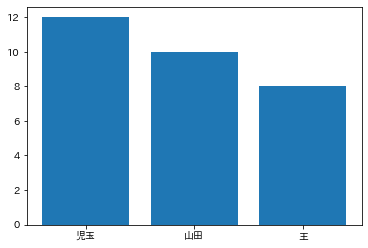

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

df = pd.read_csv('http://callisto.comlab.soft.iwate-pu.ac.jp/~takata/course/course1-3.csv')
dl = df.groupby(['第1期'])['第1期'].count()
plt.bar(dl.index,dl)
#plt.show()
plt.savefig("3.png")

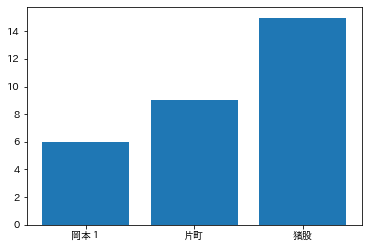

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

df = pd.read_csv('http://callisto.comlab.soft.iwate-pu.ac.jp/~takata/course/course1-3.csv')
dl = df.groupby(['第2期'])['第2期'].count()
plt.bar(dl.index,dl)
#plt.show()
plt.savefig("4.png")

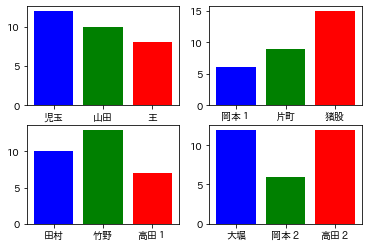

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
df = pd.read_csv('http://callisto.comlab.soft.iwate-pu.ac.jp/~takata/course/course1-3.csv')
fig = plt.figure()
cl = ['blue', 'green', 'red', 'black']
ll = ['第'+str(i+1)+'期'for i in range(4)]
axs = [None for _ in range(4)]
for figno in range(4) :
 axs[figno] = fig.add_subplot(2, 2, figno+1)
# (A)
kis = df.columns[3:7]
for i,figno in zip(kis,range(4)) :
 ddf = df.groupby(i)['氏名'].count()
# (B)
 axs[figno].bar(ddf.index,ddf,color=cl, label=cl)
#plt.show()
plt.savefig("7.png")

第2期     岡本１     片町        猪股       
第3期      竹野 高田１ 田村 竹野 高田１ 田村 竹野 高田１
第1期 第4期                            
児玉  大堀    1   1  2  0   0  0  0   1
    岡本２   0   0  1  0   1  0  0   1
    高田２   0   0  0  0   0  3  1   0
山田  大堀    0   0  0  0   0  2  0   1
    岡本２   0   0  1  0   0  0  0   1
    高田２   1   0  0  2   0  0  2   0
王   大堀    2   0  0  0   1  0  1   0
    岡本２   0   0  0  0   0  0  1   0
    高田２   1   0  0  1   0  1  0   0


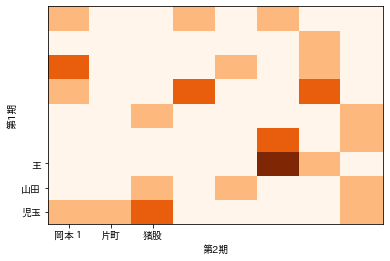

In [29]:
import pandas as pd
df = pd.read_csv('http://callisto.comlab.soft.iwate-pu.ac.jp/~takata/course/course1-3.csv')
# (A)
ct = pd.crosstab(index=[df['第1期'],df['第4期']], columns=[df['第2期'],df['第3期']])
print (ct)
# (B)
dgcol = df.groupby(['第1期']).size().index
dgrow = df.groupby(['第2期']).size().index
import matplotlib.pyplot as plt
import japanize_matplotlib
fig, ax = plt.subplots()
ax.pcolor(ct,cmap=plt.cm.Oranges)
ax.set_xticks(np.arange(dgrow.size)+0.5, minor=False)
ax.set_yticks(np.arange(dgcol.size)+0.5, minor=False)
ax.set_xticklabels(dgrow, minor=False)
ax.set_yticklabels(dgcol, minor=False)
plt.grid(False)
plt.xlabel('第2期')
plt.ylabel('第1期')
#plt.show()
plt.savefig("5.png")

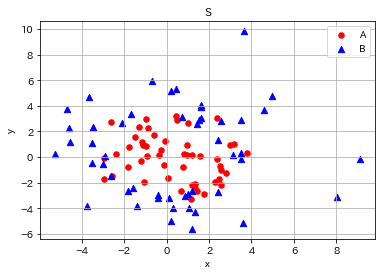

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
# データの読み込み
df = pd.read_csv('http://callisto.comlab.soft.iwate-pu.ac.jp/~takata/course/testdata3.csv',names=['label','x','y'])
# print (df.shape),
# print (df.head(4))
# データをラベルが A のものと B のものに分割し,
# それぞれ dataA, dataB に格納する
dataA = df[df.label == "A"]
dataB = df[df.label == "B"]
# print (dataB.head(4))
fig = plt.figure()

ax = fig.add_subplot(1,1,1)

plt.grid(True)
ax.scatter(dataA["x"],dataA["y"],s=30, c='red',marker='o',label='A')
ax.scatter(dataB["x"],dataB["y"],s=40, c='blue',marker='^',label='B')
ax.set_title("S")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend(loc= 'upper right')
#plt.show()
plt.savefig("9.png")

In [31]:
#4-1
import numpy as np
import pandas as pd
# 訓練データとテストデータに分割
from sklearn.model_selection import train_test_split
from sklearn import metrics
# (S1)
from sklearn.svm import LinearSVC # 線形サポートベクターマシン
# (F)
df = pd.read_csv('http://callisto.comlab.soft.iwate-pu.ac.jp/~takata/course/testdata1.csv',names=['label','x','y'])
# (A)
test_df = df.drop("label", axis=1)
#print(df.head())
# (B)
test_target_data = pd.DataFrame(df['label'],columns=["label"])
#print(test_target_data.head())
# (C)
X_train, X_test, Y_trainDF, Y_test = train_test_split(

test_df,test_target_data,test_size=20,train_size=80)

# (D)
#print(Y_trainDF.head())
Y_trainDFv = Y_trainDF.values
# print(Y_trainDFv[:5])
# (E)
Y_train = Y_trainDFv.ravel()
# print(Y_train[:5])
# 分類器オブジェクトが clf
# (S2)
clf = LinearSVC()

# X_train, Y_train の組を用いて学習を行う
clf.fit(X_train, Y_train)

# 学習結果を用いて X_test を分類し, 結果を Y_pred へ
Y_pred = clf.predict(X_test)

# 正解ラベル Y_test と比較することにより accuracy を求める
print(metrics.accuracy_score(Y_test, Y_pred))
# (LAST)
#交差検証
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, test_df, test_target_data.values.ravel())
print('* Cross-Validation scores: {}'.format(scores))
print('* Average score: {}'.format(np.mean(scores)))
from sklearn.metrics import confusion_matrix # 混同行列
cm = confusion_matrix(Y_test, Y_pred)
print (cm)
# print (cm.flatten())
tn, fp, fn, tp = cm.flatten()
print (tn, fp, fn, tp)
# (L)
p = tp / (tp+fp)
r = tp / (tp+fn)
f1_score= 2*(p*r) / (p+r)
print(p)
print(r)
print(f1_score)

0.85
* Cross-Validation scores: [0.95 1.   0.9  0.95 0.95]
* Average score: 0.95
[[8 2]
 [1 9]]
8 2 1 9
0.8181818181818182
0.9
0.8571428571428572


第2期     岡本１     片町        猪股       
第3期      竹野 高田１ 田村 竹野 高田１ 田村 竹野 高田１
第1期 第4期                            
児玉  大堀    1   1  2  0   0  0  0   1
    岡本２   0   0  1  0   1  0  0   1
    高田２   0   0  0  0   0  3  1   0
山田  大堀    0   0  0  0   0  2  0   1
    岡本２   0   0  1  0   0  0  0   1
    高田２   1   0  0  2   0  0  2   0
王   大堀    2   0  0  0   1  0  1   0
    岡本２   0   0  0  0   0  0  1   0
    高田２   1   0  0  1   0  1  0   0


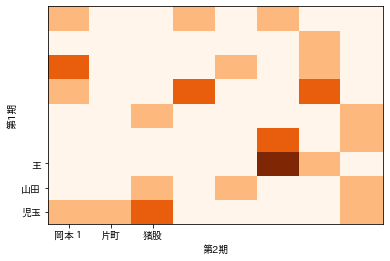

In [32]:
import pandas as pd
df = pd.read_csv('http://callisto.comlab.soft.iwate-pu.ac.jp/~takata/course/course1-3.csv')
# (A)
ct = pd.crosstab(index=[df['第1期'],df['第4期']], columns=[df['第2期'],df['第3期']])
print (ct)
# (B)
dgcol = df.groupby(['第1期']).size().index
dgrow = df.groupby(['第2期']).size().index
import matplotlib.pyplot as plt
import japanize_matplotlib
fig, ax = plt.subplots()
ax.pcolor(ct,cmap=plt.cm.Oranges)
ax.set_xticks(np.arange(dgrow.size)+0.5, minor=False)
ax.set_yticks(np.arange(dgcol.size)+0.5, minor=False)
ax.set_xticklabels(dgrow, minor=False)
ax.set_yticklabels(dgcol, minor=False)
plt.grid(False)
plt.xlabel('第2期')
plt.ylabel('第1期')
#plt.show()
plt.savefig("5.png")

In [33]:
#5-1 #線形SVM k-近傍法
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# 訓練データとテストデータに分割
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier #k-近傍法
# (S1)
from sklearn.svm import LinearSVC # 線形サポートベクターマシン
# (F)
df = pd.read_csv('http://callisto.comlab.soft.iwate-pu.ac.jp/~takata/course/testdata3.csv',names=['label','x','y'])
# (A)
test_df = df.drop("label", axis=1)
#print(df.head())
# (B)
test_target_data = pd.DataFrame(df['label'],columns=["label"])
#print(test_target_data.head())
# (C)
X_train, X_test, Y_trainDF, Y_test = train_test_split(

test_df,test_target_data,test_size=20,train_size=80)

# (D)
#print(Y_trainDF.head())
Y_trainDFv = Y_trainDF.values
# print(Y_trainDFv[:5])
# (E)
Y_train = Y_trainDFv.ravel()
# print(Y_train[:5])
# 分類器オブジェクトが clf
# (S2)
#k=1
#knc = KNeighborsClassifier(n_neighbors=k)
clf = LinearSVC()
# X_train, Y_train の組を用いて学習を行う
clf.fit(X_train, Y_train)
#knc.fit(X_train, Y_train)
# 学習結果を用いて X_test を分類し, 結果を Y_pred へ
Y_pred = clf.predict(X_test)
#Y_pred = knc.predict(X_test)
print(metrics.accuracy_score(Y_test, Y_pred))
# 正解ラベル Y_test と比較することにより accuracy を求める
#print(metrics.accuracy_score(Y_test, Y_pred))
# (LAST)
#交差検証
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, test_df, test_target_data.values.ravel())
print('* Cross-Validation scores: {}'.format(scores))
print('* Average score: {}'.format(np.mean(scores)))
from sklearn.metrics import confusion_matrix # 混同行列
cm = confusion_matrix(Y_test, Y_pred)
print (cm)
# print (cm.flatten())
tn, fp, fn, tp = cm.flatten()
print (tn, fp, fn, tp)
# (L)
p = tp / (tp+fp)
r = tp / (tp+fn)
f1_score= 2*(p*r) / (p+r)
print(p)
print(r)
print(f1_score)

0.55
* Cross-Validation scores: [0.5  0.4  0.45 0.5  0.45]
* Average score: 0.4600000000000001
[[5 4]
 [5 6]]
5 4 5 6
0.6
0.5454545454545454
0.5714285714285713


0.75
* AUC: 0.8434343434343434


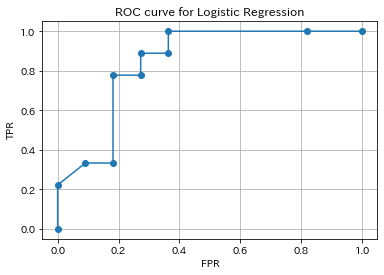

In [34]:
#5-1
#5-5 op5-5
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# 訓練データとテストデータに分割
from sklearn.model_selection import train_test_split
from sklearn import metrics
# (S1)
from sklearn.ensemble import RandomForestClassifier
# (F)
df = pd.read_csv('http://callisto.comlab.soft.iwate-pu.ac.jp/~takata/course/testdata3.csv',names=['label','x','y'])
# (A)
test_df = df.drop("label", axis=1)
#print(df.head())
# (B)
test_target_data = pd.DataFrame(df['label'],columns=["label"])
#print(test_target_data.head())
# (C)
X_train, X_test, Y_trainDF, Y_test = train_test_split(

test_df,test_target_data,test_size=20,train_size=80)

# (D)
#print(Y_trainDF.head())
Y_trainDFv = Y_trainDF.values
# print(Y_trainDFv[:5])
# (E)
Y_train = Y_trainDFv.ravel()
# print(Y_train[:5])
# 分類器オブジェクトが clf
# (S2)
clf = RandomForestClassifier()
# X_train, Y_train の組を用いて学習を行う
clf.fit(X_train, Y_train)
# 学習結果を用いて X_test を分類し, 結果を Y_pred へ
Y_pred = clf.predict(X_test)
# 正解ラベル Y_test と比較することにより accuracy を求める
print(metrics.accuracy_score(Y_test, Y_pred))
# (LAST)
# print (Y_pred[:5])
# (4-2-1)
Y_score = clf.predict_proba(X_test)
#print (Y_score[:5,1])
# (4-2-2)
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(Y_test, Y_score[:,1], pos_label='B')
#print (fpr)
#print (tpr)
#print (thres)
# (4-2-3)
auc = metrics.auc(fpr, tpr)
print ('* AUC: {}'.format(auc))
# (4-2-4) 曲線をプロット
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(fpr,tpr,marker='o')
ax.grid()
ax.set_title('ROC curve for Logistic Regression')
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
#plt.show()
plt.savefig("13.png")

In [35]:
#op5-5 (b)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 訓練データとテストデータに分割
from sklearn.model_selection import train_test_split
from sklearn import metrics
# (S1)
from sklearn.ensemble import RandomForestClassifier
# (F)
df = pd.read_csv('http://callisto.comlab.soft.iwate-pu.ac.jp/~takata/course/testdata3.csv',names=['label','x','y'])
# (F)
def showGraph(X,label,model):
# 境界線プロット用の格子状データを生成
 x1 = np.linspace(-10.0, 10.0, 50)
 x2 = np.linspace(-10.0, 10.0, 50)
# (4-4-1)
 X1, X2 = np.meshgrid(x1, x2)
 # print (X1.ravel()[:10])
 # print (X2.ravel()[:10])
# (4-4-2)
 plot_X = np.c_[X1.ravel(), X2.ravel()]
# print (plot_X[:5])
# (4-4-3)
 plot_y = model.predict(plot_X)

# 格子データで散布図をプロットし、決定境界を描画
 plt.scatter(plot_X.T[0][plot_y == 'A'], plot_X.T[1][plot_y == 'A'],

 marker='o', color="red", alpha=0.2)

 plt.scatter(plot_X.T[0][plot_y == 'B'], plot_X.T[1][plot_y == 'B'],

 marker='o', color="blue", alpha=0.2)

# データを散布図にプロット
plt.scatter(X.T[0][label == 'A'], X.T[1][label == 'A'],
marker='x', color="red", alpha=1.0)
plt.scatter(X.T[0][label == 'B'], X.T[1][label == 'B'],
marker='x', color="blue", alpha=1.0)

plt.xlabel('x') # x 軸ラベル
plt.ylabel('y') # y 軸ラベル
plt.show()
plt.savefig("13.png")

# (A)
test_df = df.drop("label", axis=1)
#print(df.head())
# (B)
test_target_data = pd.DataFrame(df['label'],columns=["label"])
#print(test_target_data.head())
# (C)
X_train, X_test, Y_trainDF, Y_test = train_test_split(

test_df,test_target_data,test_size=20,train_size=80)

# (D)
#print(Y_trainDF.head())
Y_trainDFv = Y_trainDF.values
# print(Y_trainDFv[:5])
# (E)
Y_train = Y_trainDFv.ravel()
# print(Y_train[:5])
# 分類器オブジェクトが clf
# (S2)
clf = RandomForestClassifier()

# X_train, Y_train の組を用いて学習を行う
clf.fit(X_train, Y_train)

# 学習結果を用いて X_test を分類し, 結果を Y_pred へ
Y_pred = clf.predict(X_test)

# 正解ラベル Y_test と比較することにより accuracy を求める
print(metrics.accuracy_score(Y_test, Y_pred))
# (LAST)

#ここでは実際の値をプロット
X = test_df.to_numpy()
label = test_target_data['label'].to_numpy()
# 関数 showGraph を呼び出し
showGraph(X,label,clf)


NameError: ignored

In [36]:
#5-3
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# 訓練データとテストデータに分割
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC # サポートベクターマシン
# (S1)
from sklearn.svm import LinearSVC # 線形サポートベクターマシン
# (F)
df = pd.read_csv('http://callisto.comlab.soft.iwate-pu.ac.jp/~takata/course/testdata3.csv',names=['label','x','y'])
# (A)
test_df = df.drop("label", axis=1)
#print(df.head())
# (B)
test_target_data = pd.DataFrame(df['label'],columns=["label"])
#print(test_target_data.head())
# (C)
X_train, X_test, Y_trainDF, Y_test = train_test_split(

test_df,test_target_data,test_size=20,train_size=80)

# (D)
#print(Y_trainDF.head())
Y_trainDFv = Y_trainDF.values
# print(Y_trainDFv[:5])
# (E)
Y_train = Y_trainDFv.ravel()
# print(Y_train[:5])
# 分類器オブジェクトが clf
# (S2) 以降を以下で置き換え
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10],
'gamma': [0.01, 0.1, 1, 10]}

#param_grid = {'kernel':['poly','rbf'],'C': [0.001,0.01, 0.1, 1, 10],'gamma': [0.001, 0.01, 0.1, 1, 10]}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)

grid_search.fit(X_train, Y_trainDF.values.ravel())

print('* Test set scores: {}'.format(grid_search.score(X_test,Y_test)))
print('* Best parameters: {}'.format(grid_search.best_params_))
print('* Best cross-validation scores: {}'.format(grid_search.best_score_))

import pandas as pd
gs_results = pd.DataFrame(grid_search.cv_results_)
# print (gs_results.head())
print (gs_results.columns[:3])


* Test set scores: 0.7
* Best parameters: {'C': 1, 'gamma': 0.1}
* Best cross-validation scores: 0.8
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time'], dtype='object')


0.85
* AUC: 0.6


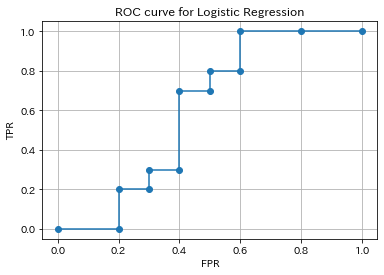

In [37]:
#5-2 #多項式カーネルSVM
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# 訓練データとテストデータに分割
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier #k-近傍法
from sklearn.svm import SVC # サポートベクターマシン
# (S1)
from sklearn.svm import LinearSVC # 線形サポートベクターマシン
# (F)
df = pd.read_csv('http://callisto.comlab.soft.iwate-pu.ac.jp/~takata/course/testdata3.csv',names=['label','x','y'])
# (A)
test_df = df.drop("label", axis=1)
#print(df.head())
# (B)
test_target_data = pd.DataFrame(df['label'],columns=["label"])
#print(test_target_data.head())
# (C)
X_train, X_test, Y_trainDF, Y_test = train_test_split(

test_df,test_target_data,test_size=20,train_size=80)

# (D)
#print(Y_trainDF.head())
Y_trainDFv = Y_trainDF.values
# print(Y_trainDFv[:5])
# (E)
Y_train = Y_trainDFv.ravel()
# print(Y_train[:5])
# 分類器オブジェクトが clf
# (S2)
#clf = SVC(kernel="poly")#(a)
clf = SVC(kernel="rbf")#(b)
# X_train, Y_train の組を用いて学習を行う
clf.fit(X_train, Y_train)
# 学習結果を用いて X_test を分類し, 結果を Y_pred へ
Y_pred = clf.predict(X_test)
print(metrics.accuracy_score(Y_test, Y_pred))
# 正解ラベル Y_test と比較することにより accuracy を求める
#OP5-2
# (LAST)
# print (Y_pred[:5])
# (4-2-1)
#Y_score = clf.predict_proba(X_test)
# print (Y_score[:5,1])
from sklearn.metrics import roc_curve
# (4-2-2)
fpr, tpr, thres = roc_curve(Y_test, Y_score[:,1], pos_label='B')
# print (fpr)
# print (tpr)
# print (thres)
# (4-2-3)
auc = metrics.auc(fpr, tpr)
print ('* AUC: {}'.format(auc))
# (4-2-4) 曲線をプロット
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(fpr,tpr,marker='o')
ax.grid()
ax.set_title('ROC curve for Logistic Regression')
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
#plt.show()
plt.savefig('14.png')

In [38]:
#5-2 #多項式カーネルSVM
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# 訓練データとテストデータに分割
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier #k-近傍法
from sklearn.svm import SVC # サポートベクターマシン
# (S1)
from sklearn.svm import LinearSVC # 線形サポートベクターマシン
# (F)
df = pd.read_csv('http://callisto.comlab.soft.iwate-pu.ac.jp/~takata/course/testdata3.csv',names=['label','x','y'])
# (F)
def showGraph(X,label,model):
# 境界線プロット用の格子状データを生成
 x1 = np.linspace(-10.0, 10.0, 50)
 x2 = np.linspace(-10.0, 10.0, 50)
# (4-4-1)
 X1, X2 = np.meshgrid(x1, x2)
 # print (X1.ravel()[:10])
 # print (X2.ravel()[:10])
# (4-4-2)
 plot_X = np.c_[X1.ravel(), X2.ravel()]
# print (plot_X[:5])
# (4-4-3)
 plot_y = model.predict(plot_X)

# 格子データで散布図をプロットし、決定境界を描画
 plt.scatter(plot_X.T[0][plot_y == 'A'], plot_X.T[1][plot_y == 'A'],

 marker='o', color="red", alpha=0.2)

 plt.scatter(plot_X.T[0][plot_y == 'B'], plot_X.T[1][plot_y == 'B'],

 marker='o', color="blue", alpha=0.2)

# データを散布図にプロット
plt.scatter(X.T[0][label == 'A'], X.T[1][label == 'A'],
marker='x', color="red", alpha=1.0)
plt.scatter(X.T[0][label == 'B'], X.T[1][label == 'B'],
marker='x', color="blue", alpha=1.0)

plt.xlabel('x') # x 軸ラベル
plt.ylabel('y') # y 軸ラベル
plt.show()
plt.savefig("13.png")
# (A)
test_df = df.drop("label", axis=1)
#print(df.head())
# (B)
test_target_data = pd.DataFrame(df['label'],columns=["label"])
#print(test_target_data.head())
# (C)
X_train, X_test, Y_trainDF, Y_test = train_test_split(

test_df,test_target_data,test_size=20,train_size=80)

# (D)
#print(Y_trainDF.head())
Y_trainDFv = Y_trainDF.values
# print(Y_trainDFv[:5])
# (E)
Y_train = Y_trainDFv.ravel()
# print(Y_train[:5])
# 分類器オブジェクトが clf
# (S2)
#clf = SVC(kernel="poly")
clf = SVC(kernel="rbf")  #(b)
# X_train, Y_train の組を用いて学習を行う
clf.fit(X_train, Y_train)
# 学習結果を用いて X_test を分類し, 結果を Y_pred へ
Y_pred = clf.predict(X_test)
print(metrics.accuracy_score(Y_test, Y_pred))
# 正解ラベル Y_test と比較することにより accuracy を求める
# (LAST)
#ここでは実際の値をプロット
X = test_df.to_numpy()
label = test_target_data['label'].to_numpy()
# 関数 showGraph を呼び出し
showGraph(X,label,clf)

NameError: ignored

In [ ]:
#4-4
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 訓練データとテストデータに分割
from sklearn.model_selection import train_test_split
from sklearn import metrics
# (S1)
from sklearn.svm import LinearSVC # 線形サポートベクターマシン
# (F)
df = pd.read_csv('http://callisto.comlab.soft.iwate-pu.ac.jp/~takata/course/testdata3.csv',names=['label','x','y'])
# (F)
def showGraph(X,label,model):
# 境界線プロット用の格子状データを生成
 x1 = np.linspace(-10.0, 10.0, 50)
 x2 = np.linspace(-10.0, 10.0, 50)
# (4-4-1)
 X1, X2 = np.meshgrid(x1, x2)
 # print (X1.ravel()[:10])
 # print (X2.ravel()[:10])
# (4-4-2)
 plot_X = np.c_[X1.ravel(), X2.ravel()]
# print (plot_X[:5])
# (4-4-3)
 plot_y = model.predict(plot_X)

# 格子データで散布図をプロットし、決定境界を描画
 plt.scatter(plot_X.T[0][plot_y == 'A'], plot_X.T[1][plot_y == 'A'],

 marker='o', color="red", alpha=0.2)

 plt.scatter(plot_X.T[0][plot_y == 'B'], plot_X.T[1][plot_y == 'B'],

 marker='o', color="blue", alpha=0.2)

# データを散布図にプロット
plt.scatter(X.T[0][label == 'A'], X.T[1][label == 'A'],
marker='x', color="red", alpha=1.0)
plt.scatter(X.T[0][label == 'B'], X.T[1][label == 'B'],
marker='x', color="blue", alpha=1.0)

plt.xlabel('x') # x 軸ラベル
plt.ylabel('y') # y 軸ラベル
plt.show()
plt.savefig("13.png")

# (A)
test_df = df.drop("label", axis=1)
#print(df.head())
# (B)
test_target_data = pd.DataFrame(df['label'],columns=["label"])
#print(test_target_data.head())
# (C)
X_train, X_test, Y_trainDF, Y_test = train_test_split(

test_df,test_target_data,test_size=20,train_size=80)

# (D)
#print(Y_trainDF.head())
Y_trainDFv = Y_trainDF.values
# print(Y_trainDFv[:5])
# (E)
Y_train = Y_trainDFv.ravel()
# print(Y_train[:5])
# 分類器オブジェクトが clf
# (S2)
clf = LinearSVC()

# X_train, Y_train の組を用いて学習を行う
clf.fit(X_train, Y_train)

# 学習結果を用いて X_test を分類し, 結果を Y_pred へ
Y_pred = clf.predict(X_test)

# 正解ラベル Y_test と比較することにより accuracy を求める
print(metrics.accuracy_score(Y_test, Y_pred))
# (LAST)

#ここでは実際の値をプロット
X = test_df.to_numpy()
label = test_target_data['label'].to_numpy()
# 関数 showGraph を呼び出し
showGraph(X,label,clf)


In [ ]:
#4-2
import numpy as np
import pandas as pd
# 訓練データとテストデータに分割
from sklearn.model_selection import train_test_split
from sklearn import metrics
# (S1)
from sklearn.svm import LinearSVC # 線形サポートベクターマシン
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# (F)
df = pd.read_csv('http://callisto.comlab.soft.iwate-pu.ac.jp/~takata/course/testdata1.csv',names=['label','x','y'])
# (A)
test_df = df.drop("label", axis=1)
#print(df.head())
# (B)
test_target_data = pd.DataFrame(df['label'],columns=["label"])
#print(test_target_data.head())
# (C)
X_train, X_test, Y_trainDF, Y_test = train_test_split(
test_df,test_target_data,test_size=20,
train_size=80,random_state=200)
# (D)
print(Y_trainDF.head())
Y_trainDFv = Y_trainDF.values
# print(Y_trainDFv[:5])
# (E)
Y_train = Y_trainDFv.ravel()
# print(Y_train[:5])
# 分類器オブジェクトが clf
# (S2)
clf = LogisticRegression()
# X_train, Y_train の組を用いて学習を行う
clf.fit(X_train, Y_train)
# 学習結果を用いて X_test を分類し, 結果を Y_pred へ
Y_pred = clf.predict(X_test)
# 正解ラベル Y_test と比較することにより accuracy を求める
print(metrics.accuracy_score(Y_test, Y_pred))
# (LAST)
# print (Y_pred[:5])
# (4-2-1)
Y_score = clf.predict_proba(X_test)
#print (Y_score[:5,1])
# (4-2-2)
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(Y_test, Y_score[:,1], pos_label='B')
#print (fpr)
#print (tpr)
#print (thres)
# (4-2-3)
auc = metrics.auc(fpr, tpr)
print ('* AUC: {}'.format(auc))
# (4-2-4) 曲線をプロット
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(fpr,tpr,marker='o')
ax.grid()
ax.set_title('ROC curve for Logistic Regression')
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
#plt.show()
plt.savefig("8.png")

In [ ]:
#4-3
import numpy as np
import pandas as pd
# 訓練データとテストデータに分割
from sklearn.model_selection import train_test_split
from sklearn import metrics
# (S1)
from sklearn.neighbors import KNeighborsClassifier 
# (F)
df = pd.read_csv('http://callisto.comlab.soft.iwate-pu.ac.jp/~takata/course/testdata1.csv',names=['label','x','y'])
# (A)
test_df = df.drop("label", axis=1)
#print(df.head())
# (B)
test_target_data = pd.DataFrame(df['label'],columns=["label"])
#print(test_target_data.head())
# (C)
X_train, X_test, Y_trainDF, Y_test = train_test_split(

test_df,test_target_data,test_size=20,train_size=80)

# (D)
#print(Y_trainDF.head())
Y_trainDFv = Y_trainDF.values
# print(Y_trainDFv[:5])
# (E)
Y_train = Y_trainDFv.ravel()
# print(Y_train[:5])
# 分類器オブジェクトが clf
# (S2)
clf = KNeighborsClassifier(n_neighbors=59)

# X_train, Y_train の組を用いて学習を行う
clf.fit(X_train, Y_train)

# 学習結果を用いて X_test を分類し, 結果を Y_pred へ
Y_pred = clf.predict(X_test)

# 正解ラベル Y_test と比較することにより accuracy を求める
print(metrics.accuracy_score(Y_test, Y_pred))
# (LAST)
#交差検証
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, test_df, test_target_data.values.ravel())
print('* Cross-Validation scores: {}'.format(scores))
print('* Average score: {}'.format(np.mean(scores)))


In [ ]:
#4-4
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 訓練データとテストデータに分割
from sklearn.model_selection import train_test_split
from sklearn import metrics
# (S1)
from sklearn.svm import LinearSVC # 線形サポートベクターマシン
# (F)
df = pd.read_csv('http://callisto.comlab.soft.iwate-pu.ac.jp/~takata/course/testdata1.csv',names=['label','x','y'])
# (F)
def showGraph(X,label,model):
# 境界線プロット用の格子状データを生成
 x1 = np.linspace(-10.0, 10.0, 50)
 x2 = np.linspace(-10.0, 10.0, 50)
# (4-4-1)
 X1, X2 = np.meshgrid(x1, x2)
 # print (X1.ravel()[:10])
 # print (X2.ravel()[:10])
# (4-4-2)
 plot_X = np.c_[X1.ravel(), X2.ravel()]
# print (plot_X[:5])
# (4-4-3)
 plot_y = model.predict(plot_X)

# 格子データで散布図をプロットし、決定境界を描画
 plt.scatter(plot_X.T[0][plot_y == 'A'], plot_X.T[1][plot_y == 'A'],

 marker='o', color="red", alpha=0.2)

 plt.scatter(plot_X.T[0][plot_y == 'B'], plot_X.T[1][plot_y == 'B'],

 marker='o', color="blue", alpha=0.2)

# データを散布図にプロット
plt.scatter(X.T[0][label == 'A'], X.T[1][label == 'A'],
marker='x', color="red", alpha=1.0)
plt.scatter(X.T[0][label == 'B'], X.T[1][label == 'B'],
marker='x', color="blue", alpha=1.0)

plt.xlabel('x') # x 軸ラベル
plt.ylabel('y') # y 軸ラベル
plt.show()
plt.savefig("10.png")

# (A)
test_df = df.drop("label", axis=1)
#print(df.head())
# (B)
test_target_data = pd.DataFrame(df['label'],columns=["label"])
#print(test_target_data.head())
# (C)
X_train, X_test, Y_trainDF, Y_test = train_test_split(

test_df,test_target_data,test_size=20,train_size=80)

# (D)
#print(Y_trainDF.head())
Y_trainDFv = Y_trainDF.values
# print(Y_trainDFv[:5])
# (E)
Y_train = Y_trainDFv.ravel()
# print(Y_train[:5])
# 分類器オブジェクトが clf
# (S2)
clf = LinearSVC()

# X_train, Y_train の組を用いて学習を行う
clf.fit(X_train, Y_train)

# 学習結果を用いて X_test を分類し, 結果を Y_pred へ
Y_pred = clf.predict(X_test)

# 正解ラベル Y_test と比較することにより accuracy を求める
print(metrics.accuracy_score(Y_test, Y_pred))
# (LAST)

#ここでは実際の値をプロット
X = test_df.to_numpy()
label = test_target_data['label'].to_numpy()
# 関数 showGraph を呼び出し
showGraph(X,label,clf)


In [ ]:
#OP5-4
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
# (S1)
from sklearn.svm import SVC # サポートベクターマシン
# (F)
# (*pandas)
df = pd.read_csv('http://callisto.comlab.soft.iwate-pu.ac.jp/~takata/course/testdata1na.csv',names=['label', 'x', 'y', 'z', 'w'])
# (A)
test_df = df.drop("label", axis=1)
# print(df.head())
# (G)
test_df = test_df.drop(columns=['z','w'],axis=1)
# (B)
test_target_data = pd.DataFrame(df['label'],columns=["label"])
# print(test_target_data.head())
# (C)
X_train, X_test, Y_trainDF, Y_test = train_test_split(

test_df,test_target_data,test_size=20,train_size=80)

# (S2)
clf = SVC()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print(metrics.accuracy_score(Y_test, Y_pred))
# (LAST)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, test_df, test_target_data.values.ravel())
print('* Cross-Validation scores: {}'.format(scores))
print('* Average score: {}'.format(np.mean(scores)))
# (LAST2)

In [ ]:
#5-5op(d)
#4-3
import numpy as np
import pandas as pd
# 訓練データとテストデータに分割
from sklearn.model_selection import train_test_split
from sklearn import metrics
# (S1)
from sklearn.ensemble import AdaBoostClassifier
# (F)
df = pd.read_csv('http://callisto.comlab.soft.iwate-pu.ac.jp/~takata/course/testdata3.csv',names=['label','x','y'])
# (A)
test_df = df.drop("label", axis=1)
#print(df.head())
# (B)
test_target_data = pd.DataFrame(df['label'],columns=["label"])
#print(test_target_data.head())
# (C)
X_train, X_test, Y_trainDF, Y_test = train_test_split(

test_df,test_target_data,test_size=20,train_size=80)

# (D)
#print(Y_trainDF.head())
Y_trainDFv = Y_trainDF.values
# print(Y_trainDFv[:5])
# (E)
Y_train = Y_trainDFv.ravel()
# print(Y_train[:5])
# 分類器オブジェクトが clf
# (S2)
clf = AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None)


# X_train, Y_train の組を用いて学習を行う
clf.fit(X_train, Y_train)

# 学習結果を用いて X_test を分類し, 結果を Y_pred へ
Y_pred = clf.predict(X_test)

# 正解ラベル Y_test と比較することにより accuracy を求める
print(metrics.accuracy_score(Y_test, Y_pred))
# (LAST)
#交差検証
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, test_df, test_target_data.values.ravel())
print('* Cross-Validation scores: {}'.format(scores))
print('* Average score: {}'.format(np.mean(scores)))

In [ ]:
#6
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
# 訓練データとテストデータに分割
from sklearn.model_selection import train_test_split
from sklearn import metrics
# (S1)
from sklearn.svm import LinearSVC # 線形サポートベクターマシン
from sklearn.linear_model import LogisticRegression # ロジスティック回帰
from sklearn.neighbors import KNeighborsClassifier # K近傍法
from sklearn.svm import SVC # サポートベクターマシン
from sklearn.tree import DecisionTreeClassifier # 決定木
from sklearn.ensemble import RandomForestClassifier # ランダムフォレスト
from sklearn.ensemble import AdaBoostClassifier # AdaBoost
# (F)
df = pd.read_csv('http://callisto.comlab.soft.iwate-pu.ac.jp/~takata/course/hiroya-train.csv')
dl = pd.read_csv('http://callisto.comlab.soft.iwate-pu.ac.jp/~takata/course/hiroya-test.csv')
# (A)
test_df = df.drop("target", axis=1)
#print(df.head())

# (B)
test_target_data = pd.DataFrame(df['target'],columns=["target"])
#print(test_target_data.head())
# (C)
X_train, X_test, Y_trainDF, Y_test = train_test_split(

test_df,test_target_data,test_size=4,train_size=32)

# (D)
#print(Y_trainDF.head())
Y_trainDFv = Y_trainDF.values
# print(Y_trainDFv[:5])
# (E)
Y_train = Y_trainDFv.ravel()
# print(Y_train[:5])
# 分類器オブジェクトが clf
# (S2)

clf = LinearSVC()
#clf= SVC()
#clf = KNeighborsClassifier(n_neighbors=1)
#clf = SVC(kernel="poly")
#clf = SVC(kernel="rbf")  #(b)
#clf = AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None)
#clf = LogisticRegression()
#clf = RandomForestClassifier()
# X_train, Y_train の組を用いて学習を行う
clf.fit(X_train, Y_train)

# 学習結果を用いて X_test を分類し, 結果を Y_pred へ
hiroya_pred = clf.predict(dl)
print(hiroya_pred)
# 正解ラベル Y_test と比較することにより accuracy を求める
#print(metrics.accuracy_score(Y_test, Y_pred))
# (LAST)
#交差検証
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, test_df, test_target_data.values.ravel())
print('* Cross-Validation scores: {}'.format(scores))
print('* Average score: {}'.format(np.mean(scores)))

In [ ]:
#6
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
# 訓練データとテストデータに分割
from sklearn.model_selection import train_test_split
from sklearn import metrics
# (S1)
from sklearn.svm import LinearSVC # 線形サポートベクターマシン
from sklearn.linear_model import LogisticRegression # ロジスティック回帰
from sklearn.neighbors import KNeighborsClassifier # K近傍法
from sklearn.svm import SVC # サポートベクターマシン
from sklearn.tree import DecisionTreeClassifier # 決定木
from sklearn.ensemble import RandomForestClassifier # ランダムフォレスト
from sklearn.ensemble import AdaBoostClassifier # AdaBoost
# (F)
df = pd.read_csv('http://callisto.comlab.soft.iwate-pu.ac.jp/~takata/course/hiroya-train.csv')
dl = pd.read_csv('http://callisto.comlab.soft.iwate-pu.ac.jp/~takata/course/hiroya-test.csv')
# (A)
test_df = df.drop("target", axis=1)
#print(df.head())
# (B)
test_target_data = pd.DataFrame(df['target'],columns=["target"])
#print(test_target_data.head())
# (C)
X_train, X_test, Y_trainDF, Y_test = train_test_split(

test_df,test_target_data,test_size=4,train_size=32)

# (D)
#print(Y_trainDF.head())
Y_trainDFv = Y_trainDF.values
# print(Y_trainDFv[:5])
# (E)
Y_train = Y_trainDFv.ravel()
# print(Y_train[:5])
# 分類器オブジェクトが clf
# (S2)

# (S2) 以降を以下で置き換え
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10],
'gamma': [0.01, 0.1, 1, 10]}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)

grid_search.fit(X_train, Y_trainDF.values.ravel())

print('* Test set scores: {}'.format(grid_search.score(X_test,Y_test)))
print('* Best parameters: {}'.format(grid_search.best_params_))
print('* Best cross-validation scores: {}'.format(grid_search.best_score_))

In [ ]:
import numpy as np
import pandas as pd
# 訓練データとテストデータに分割
from sklearn.model_selection import train_test_split
from sklearn import metrics
# (S1)
from sklearn.svm import LinearSVC # 線形サポートベクターマシン
# (F)
df = pd.read_csv('http://callisto.comlab.soft.iwate-pu.ac.jp/~takata/course/hiroya-train.csv')
dl = pd.read_csv('http://callisto.comlab.soft.iwate-pu.ac.jp/~takata/course/hiroya-test.csv')
# (A)
# (A)
test_df = df.drop("target", axis=1)
print(df.head())
# (B)
test_target_data = pd.DataFrame(df['target'],columns=["target"])
print(test_target_data.head())
# (C)
X_train, X_test, Y_trainDF, Y_test = train_test_split(

test_df,test_target_data,test_size=4,train_size=32)

# (D)
print(Y_trainDF.head())
Y_trainDFv = Y_trainDF.values
print(Y_trainDFv[:5])
# (E)
Y_train = Y_trainDFv.ravel()
print(Y_train[:5])
# 分類器オブジェクトが clf
# (S2)
clf = LinearSVC()
# X_train, Y_train の組を用いて学習を行う
clf.fit(X_train, Y_train)
# 学習結果を用いて X_test を分類し, 結果を Y_pred へ
Y_pred = clf.predict(X_test)
# 正解ラベル Y_test と比較することにより accuracy を求める
print(metrics.accuracy_score(Y_test, Y_pred))
# (LAST)

In [ ]:
33**7%1517

In [ ]:
1228**103%1517

In [ ]:
100**7%1517

In [ ]:
1062**103%1517